<a href="https://colab.research.google.com/github/shradhakoot1/code/blob/main/music_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('music.csv')

In [3]:
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [4]:
X=df.drop(columns=['genre']) # input 
y=df['genre']

In [5]:
X


,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [6]:
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [7]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [8]:
model.fit(X,y) # we passed the entire data set

DecisionTreeClassifier()

In [9]:
 predictions=model.predict([[21,1],[22,0]]) # make predictions for 21 year old male and 22 year old female

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
predictions

array(['HipHop', 'Dance'], dtype=object)

In [11]:
# dividing the data into 80-20:

In [12]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X.values,y,test_size=0.2)

In [13]:
model1= DecisionTreeClassifier()
model1.fit(xtrain,ytrain)
predictions=model1.predict(xtest)

In [14]:
predictions1=model1.predict(xtest)

In [15]:
predictions1

array(['HipHop', 'Classical', 'HipHop', 'Jazz'], dtype=object)

In [16]:
ytest

2       HipHop
8    Classical
0       HipHop
5         Jazz
Name: genre, dtype: object

In [17]:
# we have to calculate the accuracy i.e to compare prediction and actual values

In [18]:


from sklearn.metrics import accuracy_score

In [19]:
score=accuracy_score(ytest,predictions1)

In [20]:
score

1.0

In [21]:

### persisting  a model .

In [22]:
# saving a model n using it

In [23]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
pip install --user joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:

!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib as jb  # this joblib object has methods for saving and loading mdels

In [27]:

jb.dump(model,'music-rec.jb')

['music-rec.jb']

In [28]:
mod=jb.load('music-rec.jb')

In [29]:
predictions=mod.predict([[21,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [30]:
predictions

array(['HipHop'], dtype=object)

visualizing decesion tree

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


music=pd.read_csv('music.csv')
x=music.drop(columns='genre')
y=music['genre']


model=DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [32]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 30.50
|   |--- feature_0 <= 25.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: Dance
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: HipHop
|   |--- feature_0 >  25.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: Acoustic
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: Jazz
|--- feature_0 >  30.50
|   |--- class: Classical



In [33]:

import matplotlib.pyplot as plt


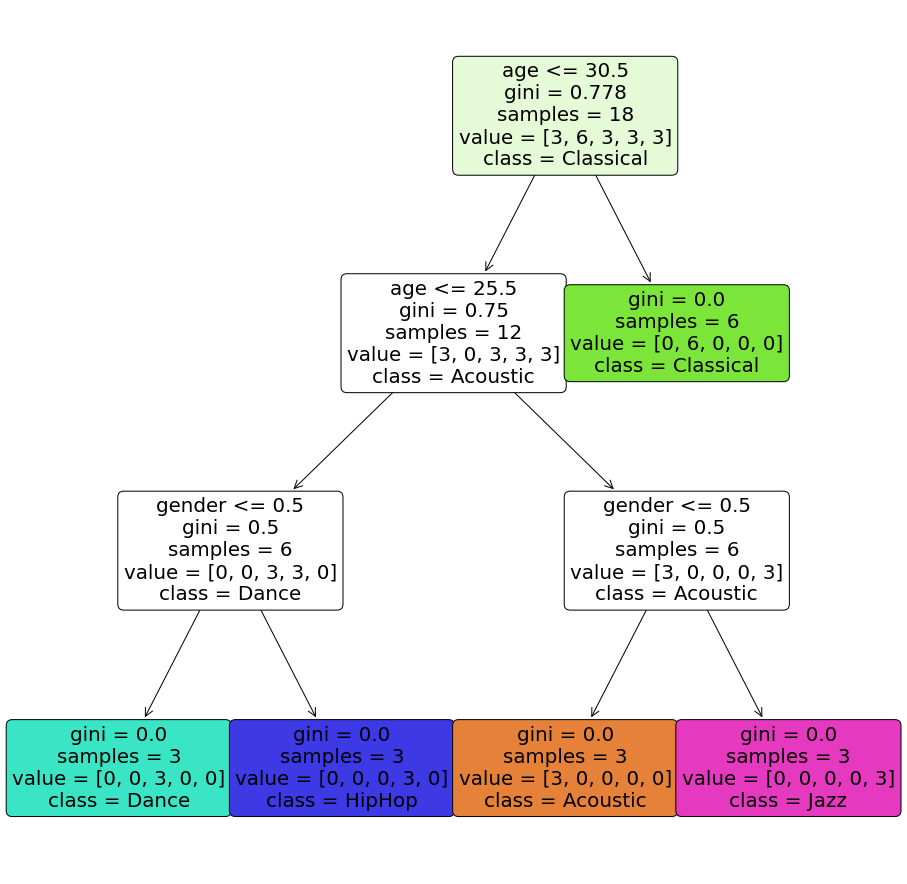

In [34]:
fig = plt.figure(figsize=(16,16))
_ = tree.plot_tree(model, 
                   feature_names=['age','gender'],  
                   class_names=sorted(y.unique()),
                   label='all',
                   rounded=True,
                   filled=True)